<div>
<img src="https://www.ul.ie/themes/custom/ul/logo.jpg" width="350"/>
</div> 

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI 
## SEM2 2022/3

### CS6462 Etivity 2 - Building a Bayesian Network on a Real-Life Scenario

### Instructor: Emil Vassev
March 7th, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: Siddharth
### Student Surname: Prince
### Student ID: 23052058
### Date of Final Submission: <span style="color:red">TODO: put the date when you submitted for grading</span>
***

## Task
In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in “Notebook Lesson: Building Bayesian Networks with Python”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures. 
## The real-life scenario
Let’s suppose that a UL student is taking the CS6264 module “Probabilistic and Explainable AI”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity. 

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (20%)

### Step 1.1. Describe the problem (5%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>

#### Problem description:
- Need to find the **quality of the letter of recommendation** which is the *observation* here.
- There are 4 independent random variables:
  1. intelligence, **I** (low, high)
  2. module difficulty, **D** (easy, hard)
  3. health status, **H** (sick, healthy)
  4. forum activity, **F** (not active, active)
- The two dependent variables are:
  1. grade, **G** (A, B, C) dependent on
     - intelligence
     - module difficulty
     - health
  2. recommendation letter quality, **R** (weak, strong) dependent on
     - grade
     - forum activity

### Step 1.2. Draw and show the DAG (7%)

In [12]:
from IPython.display import Image

### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (7%)

In [16]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt

model = BayesianNetwork([('intelligence', 'grade'), ('module_difficulty', 'grade'), ('health_status', 'grade'),
                         ('grade', 'recommendation_letter'), ('forum_activity', 'recommendation_letter')]) 

### Step 1.4. Show the DAG of the Bayesian Network (1%)

StopIteration: 

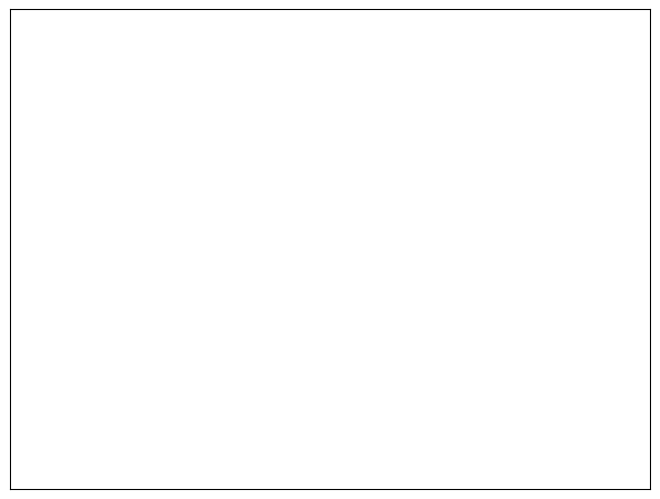

In [17]:
nx.draw(model, with_labels=True)
plt.show()
plt.close()

## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (50%)

### Step 2.1: Build the probability distribution tables with TabularCPD (46%)

In [ ]:
#**** define the Conditional Probability Distributions (CPDs)

# define CPD for student's intelligence, I
#
cpd_intelligence = TabularCPD (
    # associate the distribution table with a random variable - must be included in the Bayesian model
    variable="intelligence",

    # define the cardinality of the variable domain, i.e., binary = 2 -> domain = {yes, no} 
    variable_card=2,
    
    # define the distribution table 
    # values are ordered following the domain {high, low}
    # e.g., P (intelligence=high) = 0.3; P (intelligence=low) = 0.7 
    values=[[0.3], [0.7]] 
)    

# define CPD for module_difficulty, D
cpd_module_difficulty = TabularCPD (
    variable="module_difficulty",
    variable_card=2,
    values=[[0.6], [0.4]] # P(module_difficulty=easy) = 0.6, P(module_difficulty=hard)=0.4
)

# define CPD for health_status, H
cpd_health_status = TabularCPD (
    variable="health_status",
    variable_card=2,
    values=[[0.2], [0.8]] # P(health_status=healthy) = 0.8, P(health_status=sick)=0.2
)

# define CPD for grade, G
cpd_grade = TabularCPD (
    variable="grade",
    variable_card=3,

    # define the distribution table 
    # 
    # this distrbution table includes values for all the combinations of the values 
    # held by the variables that condition this variable
    #
    # intelligence = I, module_difficulty = D, health_status = H, grade = G
    # G=A => {[I=low,D=easy,H=healthy],[I=low,D=easy,H=sick],[I=low,D=hard,H=healthy],[I=low,D=hard,H=sick],
    #         [I=high,D=easy,H=healthy],[I=high,D=easy,H=sick],[I=high,D=hard,H=healthy],[I=high,D=hard,H=sick]}
    # G=B => {[I=low,D=easy,H=healthy],[I=low,D=easy,H=sick],[I=low,D=hard,H=healthy],[I=low,D=hard,H=sick],
    #         [I=high,D=easy,H=healthy],[I=high,D=easy,H=sick],[I=high,D=hard,H=healthy],[I=high,D=hard,H=sick]}
    # G=C => {[I=low,D=easy,H=healthy],[I=low,D=easy,H=sick],[I=low,D=hard,H=healthy],[I=low,D=hard,H=sick],
    #         [I=high,D=easy,H=healthy],[I=high,D=easy,H=sick],[I=high,D=hard,H=healthy],[I=high,D=hard,H=sick]}
    # G=A + G=B + G=C = 1 
    #    
    values=[[1, 1, 0.5, 0], 
            [0, 0, 0.5, 1]],

    # define the evidences - one of the causes must be true 
    evidence=["electricity_failure", "computer_malfunction"],
    evidence_card=[2,2]
) 

# define CPD for forum_activity, F
cpd_forum_activity = TabularCPD (
    variable="forum_activity",
    variable_card=2,
    values=[[0.25], [0.75]] # P(forum_activity=not_active) = 0.25, P(forum_activity=active)=0.75
)

### Step 2.2: Associate the distribution models with the network structure (2%)

In [ ]:
# your code goes here

### Step 2.3: Check the model (2%)

In [ ]:
# your code goes here

## Step 3: Inference with the Bayesian Network (30%)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence is a strong recommendation letter (10%)

In [ ]:
# your code goes here

In [ ]:
# show the posterior probability results
# your code goes here

### Step 3.2: Infer Prior Probability of having a strong recommendation letter with no evidence (10%)

In [ ]:
# your code goes here

In [ ]:
# show the prior probability results
# your code goes here

### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (10%)

In [ ]:
# your code goes here

In [ ]:
# show the prior probability results
# your code goes here